# Predicting the USA housing price with the help of scikit-learn.
## Considering Standard Scaler

In [135]:
import pandas as pd
import numpy as np

In [136]:
import matplotlib.pyplot as plt

In [137]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [138]:
df=pd.read_csv('USA_Housing.csv')
# df.head(3)

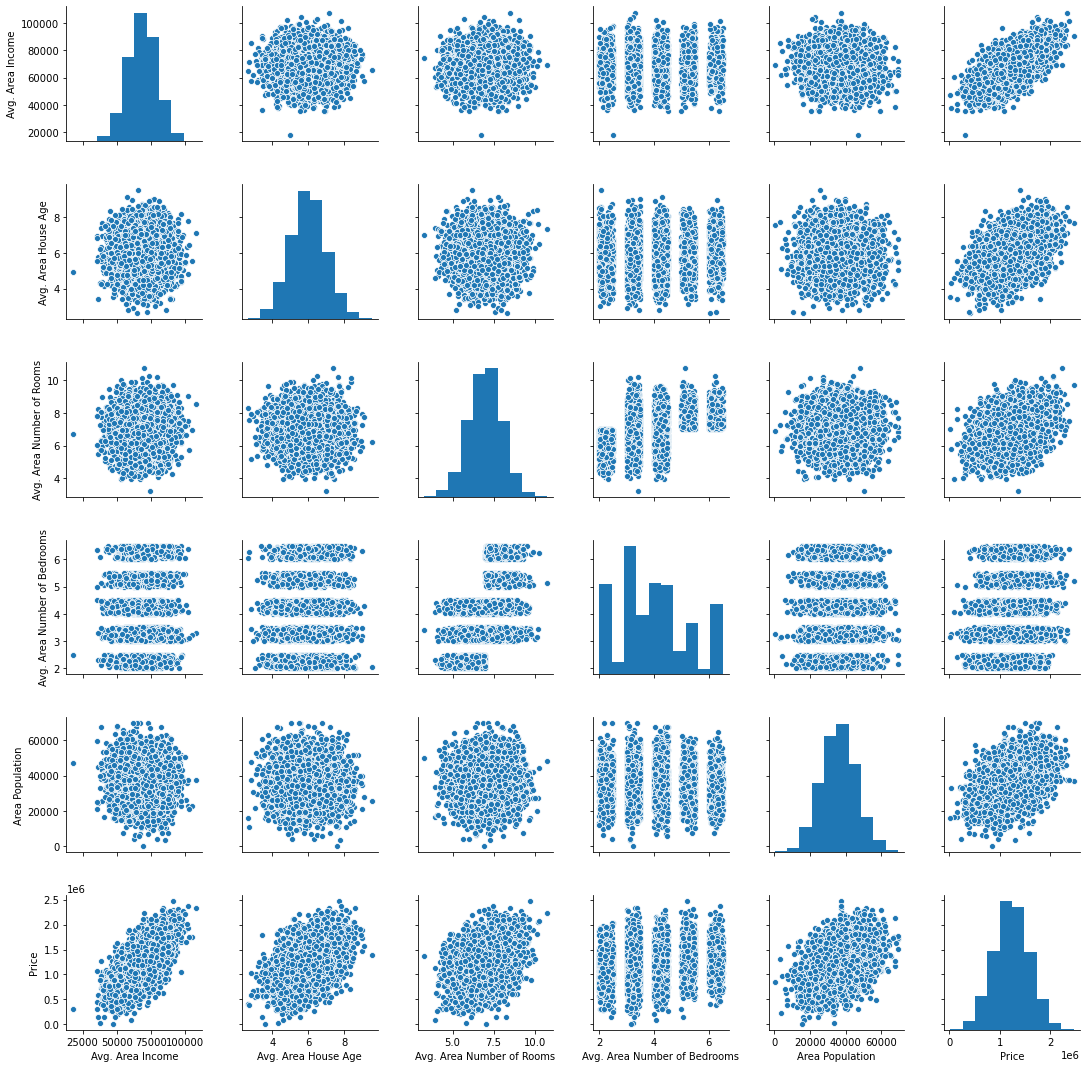

In [100]:
sns.pairplot(df)

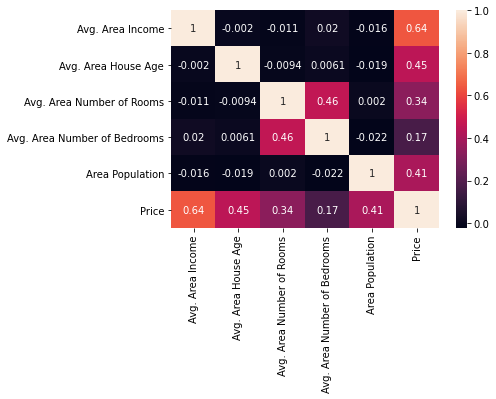

In [101]:
sns.heatmap(df.corr(),annot=True)

In [139]:
x=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
x.head(3)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400


In [140]:
from sklearn.preprocessing import StandardScaler

In [141]:
ss=StandardScaler()

In [142]:
ss.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [143]:
scaled_features=ss.transform(x)
# scaled_features[:3]

In [144]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [145]:
df_scaled=pd.DataFrame(scaled_features,columns=df.columns[:-2])

In [146]:
df_scaled.head(3)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,1.028660,-0.296927,0.021274,0.088062,-1.317599
1,1.000808,0.025902,-0.255506,-0.722301,0.403999
2,-0.684629,-0.112303,1.516243,0.930840,0.072410


In [147]:
from sklearn.model_selection import train_test_split

In [148]:
y=df['Price']
[x_train,x_test,y_train,y_test]=train_test_split(df_scaled,y, test_size=0.25, random_state=101)

## Cross Validation

In [155]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
lm=LinearRegression()
ridge=Ridge()
lasso=Lasso()
par={'alpha':[1e-20,1e-15,1e-10,1e-5,1e-2,1e-1,1,3,5,8,12,18,25,35,45,70,100]}
ridge_regressor=GridSearchCV(ridge,par,cv=10)
lasso_regressor=GridSearchCV(lasso,par,cv=10)

In [156]:
def get_score(model,df_scaled,y):
    model_score=cross_val_score(model,df_scaled,y,cv=10)
    return model_score

In [157]:
model=[lm,ridge_regressor,lasso_regressor]
for i in model:
#     print(f"{str(i)}")
#     get_score(i,df_scaled,y)
    print(round(100*get_score(i,df_scaled,y).mean(),2))

0.9173792621537308
0.9173790765435687
0.9173791738982594


## Linear Regression

In [158]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [159]:
print(lm.intercept_,lm.coef_)

1232733.7579107063 [230592.50844655 163465.30299053 121992.50639948   2239.22846954
 151347.08646101]


In [160]:
lm.predict(x_test)

array([1258816.37337318,  823463.99816306, 1741498.0262734 , ...,
       1117876.18477598,  720574.23077619, 1516900.35119194])

## Score

In [90]:
print('The LR score is ',round(100*lm.score(x_test,y_test),2),'%')

The score is  91.71 %


### Merge

In [91]:
df_pred=pd.DataFrame(lm.predict(x_test))
df_pred=df_pred.set_index(x_test.index)
df_pred.columns=['price_pred']

In [92]:
df_merge=pd.merge(df_pred,df,left_index=True,right_index=True,how='left')

## Plotting

Text(0.5, 1.0, 'Price based on Area Population')

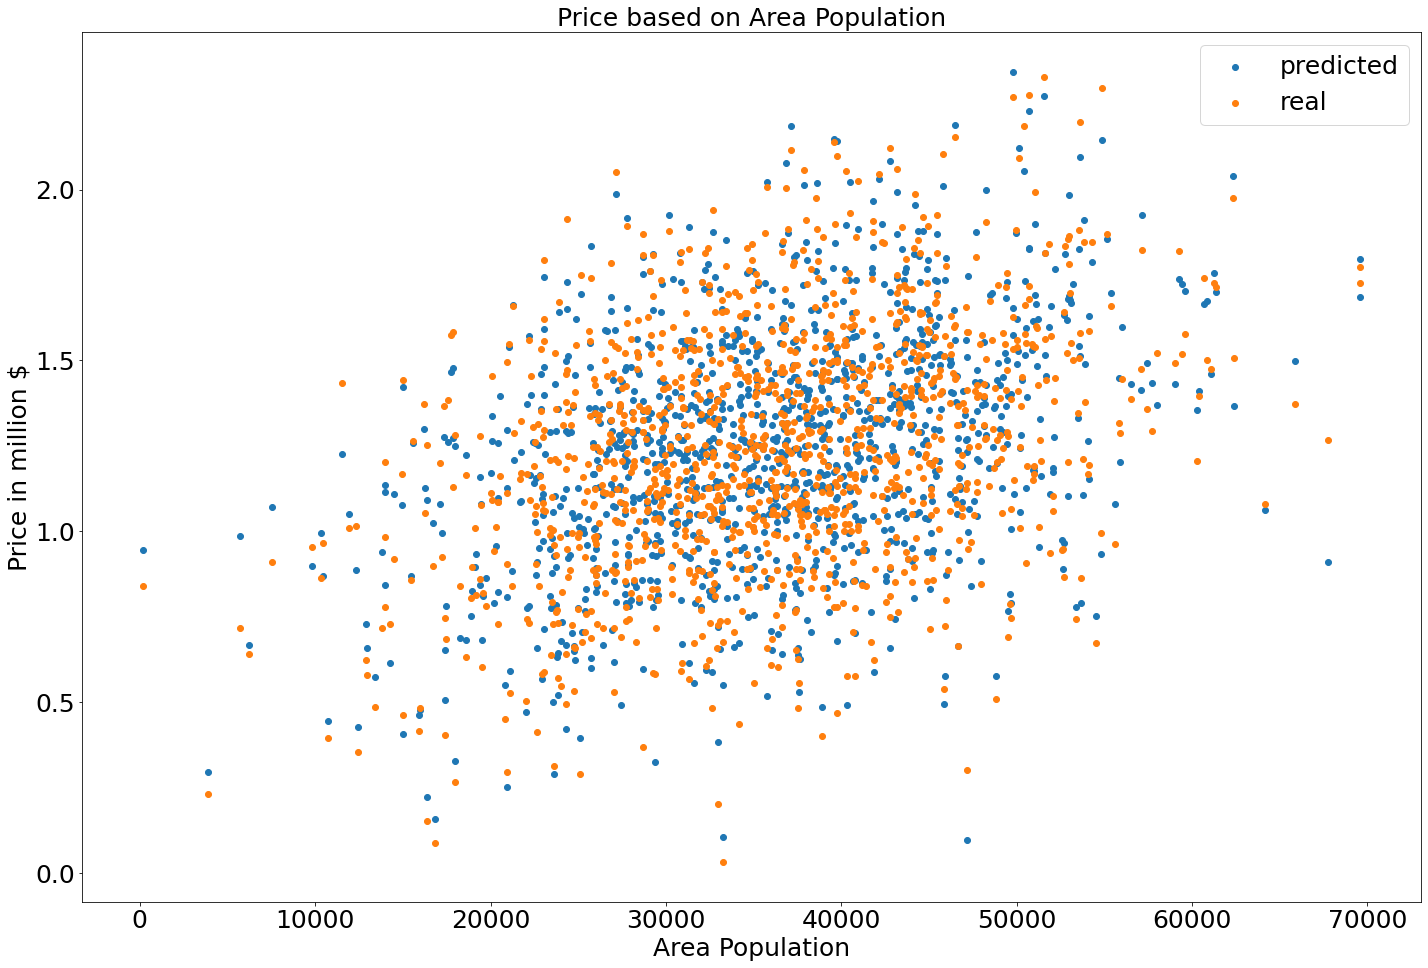

In [86]:
fig = plt.figure(figsize=(24, 16))
plt.scatter(df_merge['Area Population'],df_merge['price_pred']/1e6, label="predicted")
plt.scatter(df_merge['Area Population'],df_merge['Price']/1e6, label="real")
plt.legend(loc="upper right",fontsize=25)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel('Price in million $',fontsize=25)
plt.xlabel('Area Population',fontsize=25)
plt.title('Price based on Area Population',fontsize=25)

Text(0.5, 1.0, 'Price based on Avg. Area Income')

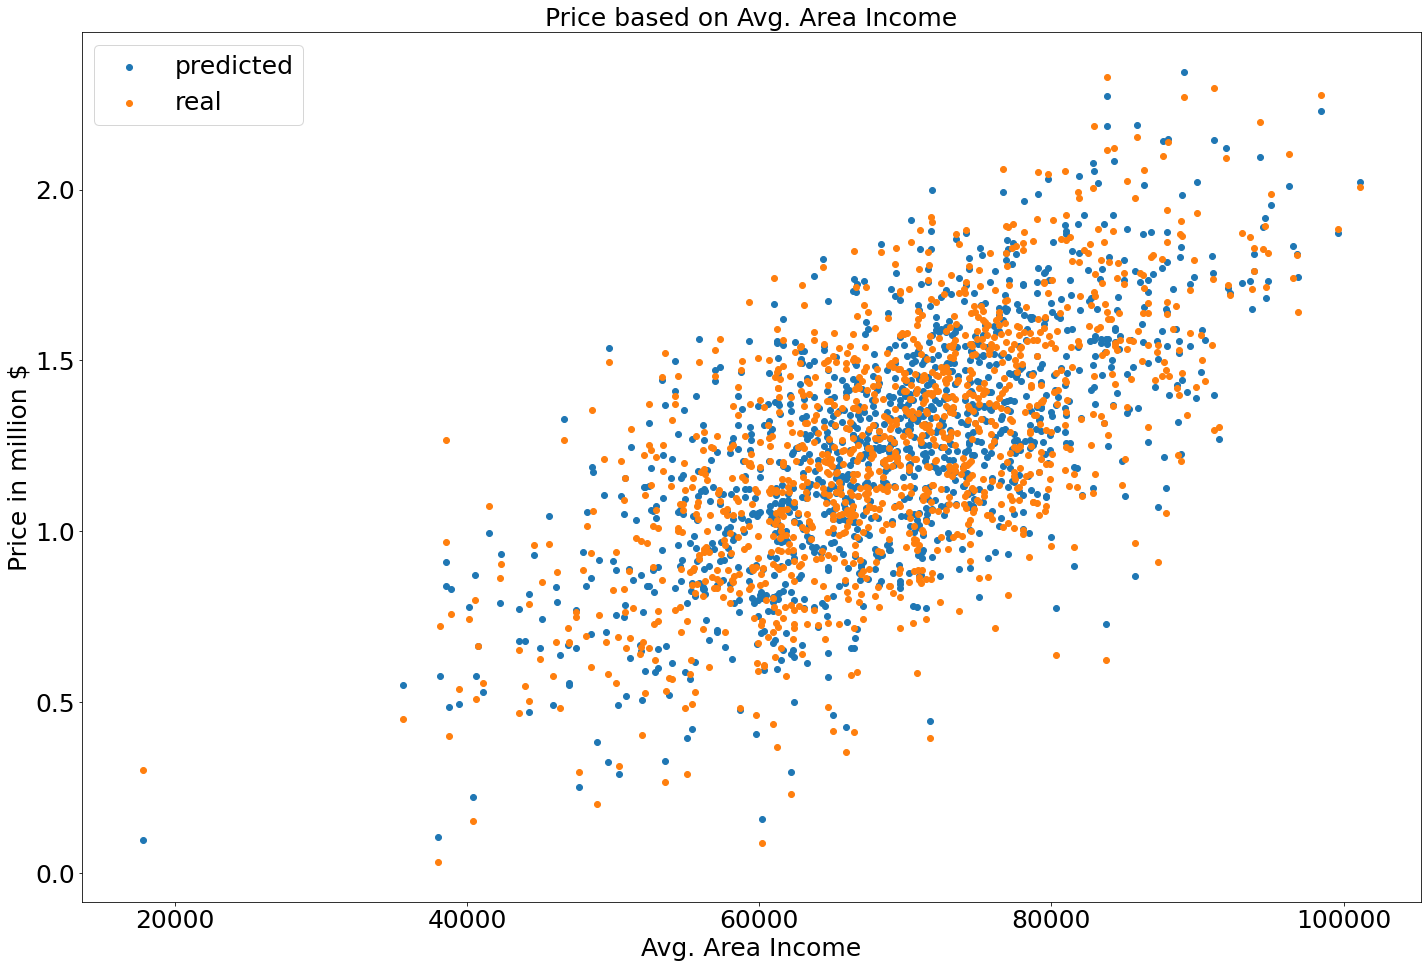

In [88]:
fig = plt.figure(figsize=(24, 16))
plt.scatter(df_merge['Avg. Area Income'],df_merge['price_pred']/1e6, label="predicted")
plt.scatter(df_merge['Avg. Area Income'],df_merge['Price']/1e6, label="real")
plt.legend(loc="upper left",fontsize=25)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel('Price in million $',fontsize=25)
plt.xlabel('Avg. Area Income',fontsize=25)
plt.title('Price based on Avg. Area Income',fontsize=25)

Text(0.5, 1.0, 'Price based on Avg. Area House Age')

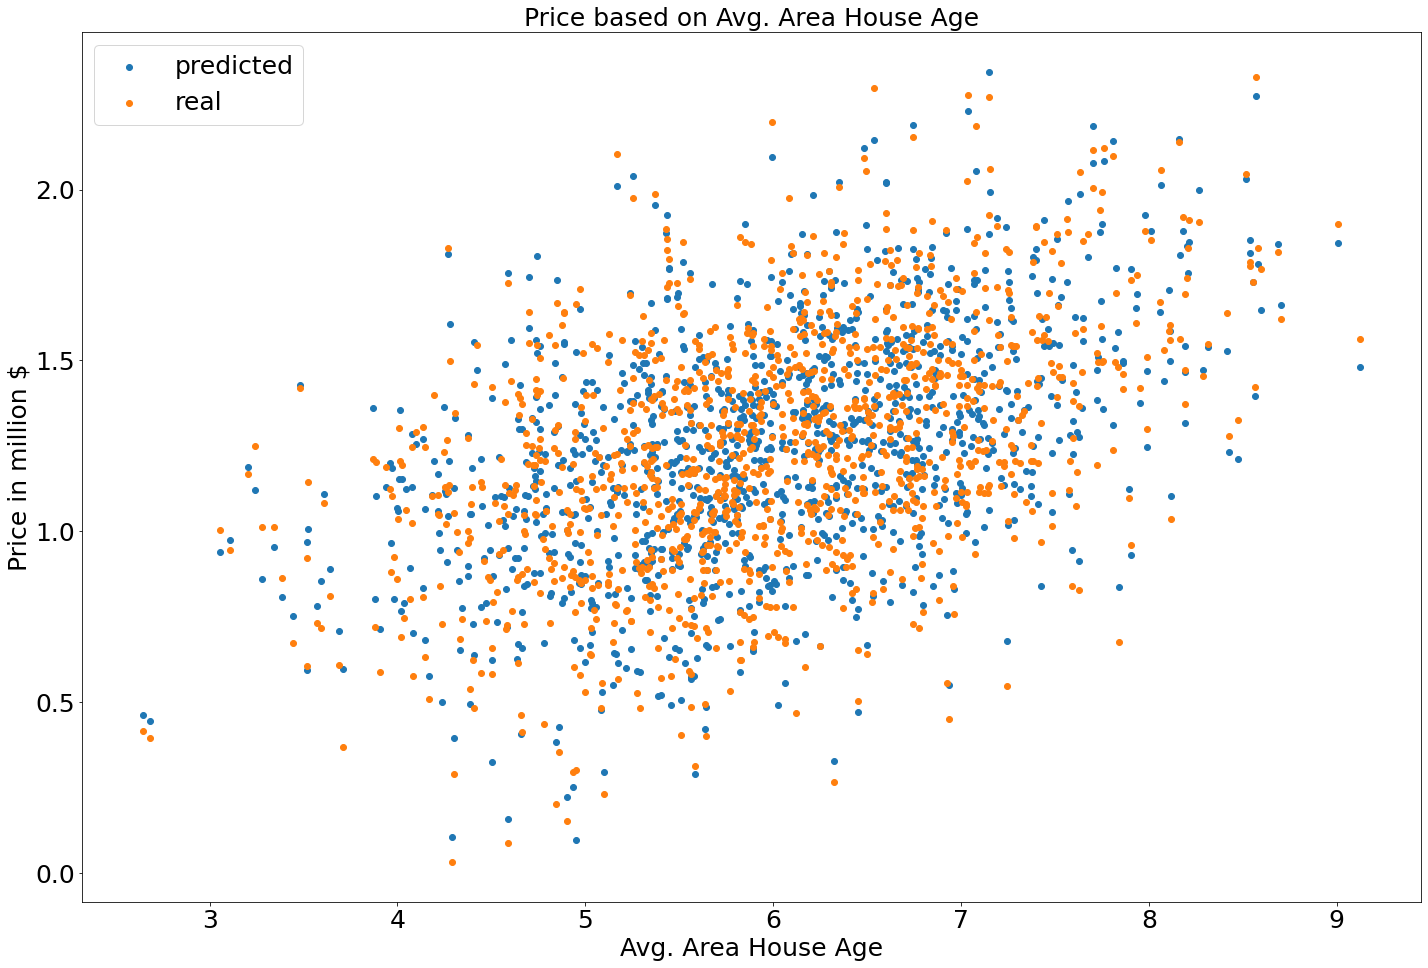

In [89]:
fig = plt.figure(figsize=(24, 16))
plt.scatter(df_merge['Avg. Area House Age'],df_merge['price_pred']/1e6, label="predicted")
plt.scatter(df_merge['Avg. Area House Age'],df_merge['Price']/1e6, label="real")
plt.legend(loc="upper left",fontsize=25)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel('Price in million $',fontsize=25)
plt.xlabel('Avg. Area House Age',fontsize=25)
plt.title('Price based on Avg. Area House Age',fontsize=25)

Text(0.5, 1.0, 'Price based on Avg. Area Number of Rooms')

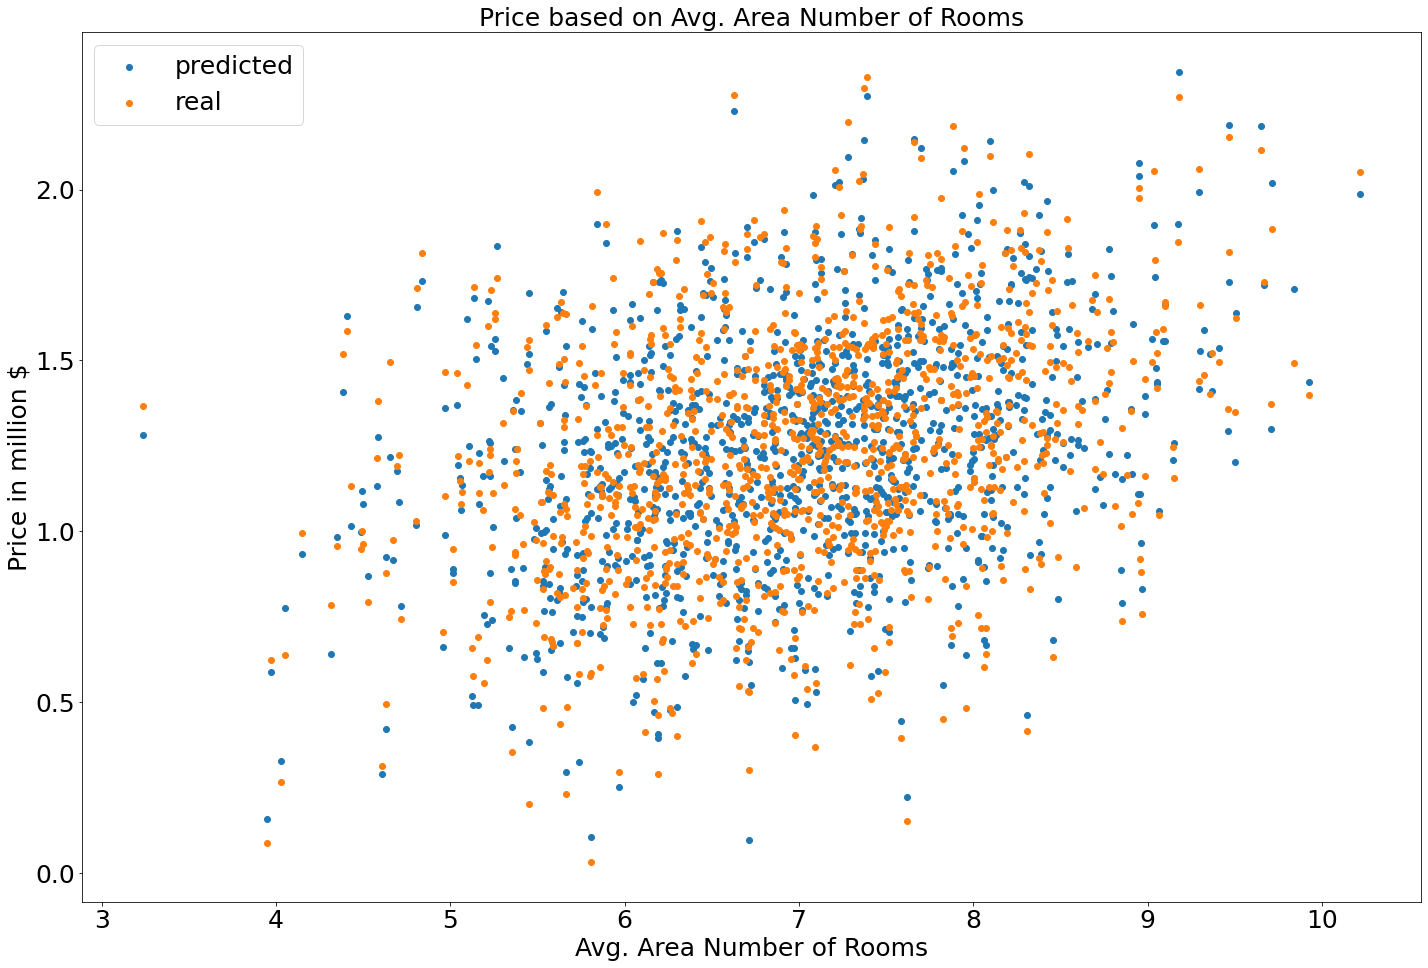

In [93]:
fig = plt.figure(figsize=(24, 16))
plt.scatter(df_merge['Avg. Area Number of Rooms'],df_merge['price_pred']/1e6, label="predicted")
plt.scatter(df_merge['Avg. Area Number of Rooms'],df_merge['Price']/1e6, label="real")
plt.legend(loc="upper left",fontsize=25)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel('Price in million $',fontsize=25)
plt.xlabel('Avg. Area Number of Rooms',fontsize=25)
plt.title('Price based on Avg. Area Number of Rooms',fontsize=25)

Text(0.5, 1.0, 'Price based on Avg. Area Number of Bedrooms')

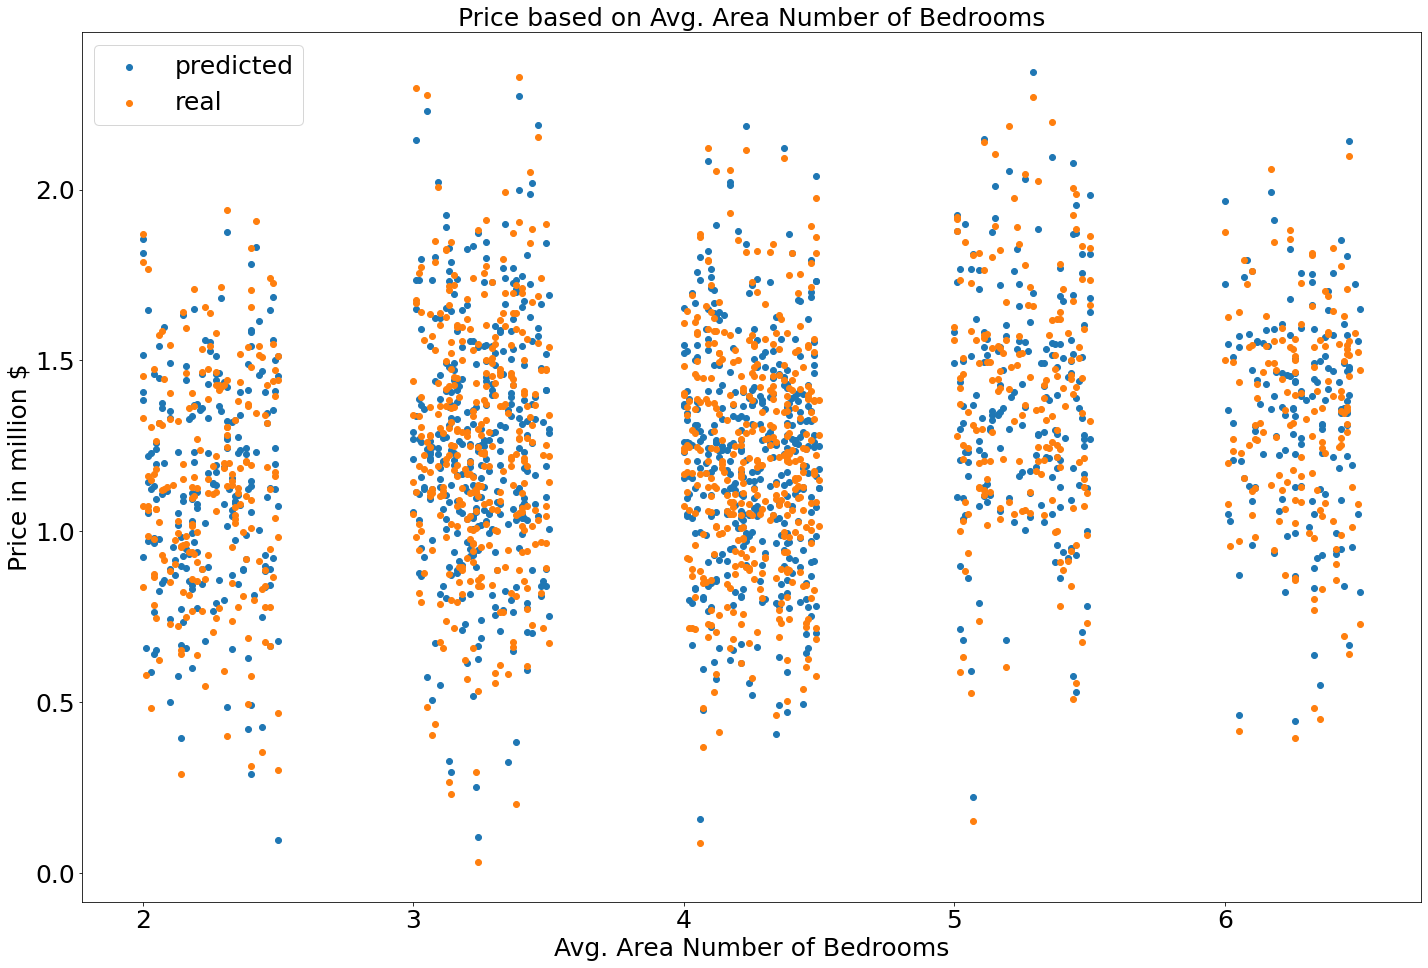

In [94]:
fig = plt.figure(figsize=(24, 16))
plt.scatter(df_merge['Avg. Area Number of Bedrooms'],df_merge['price_pred']/1e6, label="predicted")
plt.scatter(df_merge['Avg. Area Number of Bedrooms'],df_merge['Price']/1e6, label="real")
plt.legend(loc="upper left",fontsize=25)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel('Price in million $',fontsize=25)
plt.xlabel('Avg. Area Number of Bedrooms',fontsize=25)
plt.title('Price based on Avg. Area Number of Bedrooms',fontsize=25)